# Computational methods for Bayesian inference

Joshua French

To open this information in an interactive Colab notebook, click the
Open in Colab graphic below.

<a href="https://colab.research.google.com/github/jfrench/BayesianStatistics/blob/master/lectures/Math7393-03c-Computational-methods-for-Bayesian-inference-Stochastic.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg">
</a>

------------------------------------------------------------------------

# Stochastic methods

## Rejection sampling

Rejection sampling can be used to draw samples from a target density
$p(\theta \mid y)$ or its unnormalized version $q(\theta \mid y)$.

Rejection sampling assumes there exists a *proposal distribution* $G$
with density function $g(\theta)$ such that:

-   We can easily draw a realization from $G$, i.e., the distribution
    defined by $g(\theta)$.
-   If $p(\theta = \theta^{*} \mid y) > 0$, then
    $g(\theta = \theta^{*} ) > 0$.
-   The *importance ratio* $p(\theta \mid y) / g(\theta)$ must have a
    known bound.
    -   i.e., there exists $M$ such that for all $\theta$,
        $p(\theta \mid y) / g(\theta) \leq M$.

Rejection sampling draws $B$ samples from $p(\theta \mid y)$ using the
following algorithm:

1.  Sample $\theta^{*}$ from the distribution defined by $g(\theta)$.
2.  Accept $\theta^{*}$ as a sample from $p(\theta \mid y)$ with
    probability

$$p(\theta^{*} \mid y) / (M g(\theta^{*} )).$$

    -   If $\theta^{*}$ is accepted, continue to step 3.
    -   Otherwise, return to step 1.

1.  Return to step 1 until $B$ draws from $g(\theta)$ have been
    accepted.

An alternative approach to decide whether we accept the proposed value,
$\theta^{*}$, from $g(\theta)$ is:

-   Draw $u^{*}$ from a $U(0, M g(\theta^{*} ) )$ distribution.
-   Keep $\theta^{*}$ if $u^{*} \leq p(\theta^{*} \mid y)$.

Comments about rejection sampling:

-   The unnormalized density, $q(\theta \mid y)$, is almost always used
    instead of the true density, $p(\theta \mid y)$
-   $p(\theta \mid y) \leq M g(\theta \mid y)$ ensures the acceptance
    probability is no larger than 1.
-   $M$ should be chosen so that $M g(\theta \mid y)$ is as close as
    possible to $p(\theta \mid y)$.

## Rejection sampling example 1

-   Suppose the (unnormalized) target density is
    $q(\theta | y) = \theta(1-\theta)I_{(0,1)}(\theta).$
-   The $U(0, 1)$ density, i.e., $g(\theta)=I_{(0,1)}(\theta)$, bounds
    \$ q(y) \$.
-   $\text{argmax}_{\theta}q(\theta \mid y) = 0.5$ with \$ q(0.5 y) =
    0.25 \$.
-   Pick $M = 0.25$.

Let’s define an unnormalized target density.

In [1]:
qtarget = function(theta) {
  theta * (1 - theta)
}

Let’s define a bounding function, $g(\theta)M$.

In [2]:
# define bounding function
gM = function(theta) {
  rep(.25, length(theta))
}

Let’s plot the target density and bounding function.

In [3]:
theta = seq(0, 1, len = 1000)
par(mar = c(4, 4, 0.4, 0.4))
plot(theta, qtarget(theta), type = "l", xlab = expression(theta),
     ylab = expression(q(theta*"|"*y)))
lines(theta, gM(theta), col = "blue")

Consider drawing a sample from $p(\theta \mid y)$:

-   We draw a value $\theta^*$ from the $U(0,1)$ distribution.
    -   Suppose this value is $\theta^*=0.6$.
-   We need to decide whether we keep $\theta^*$.
    -   Note that $M g(\theta)$ evaluated at $0.6$ is
        $0.25 \times 1 = 0.25$.
    -   Note that $q(0.6 \mid y) = 0.6(1-0.6) = 0.24$.
-   Draw $u^{*}$ from $U(0, 0.25)$.
    -   Let’s say $u^{*} = 0.066$.
    -   Since $u^{*}<q(\theta\mid y) = 0.24$, we accept it as a sample
        from $q(\theta\mid y)$.

Let’s visualize this.

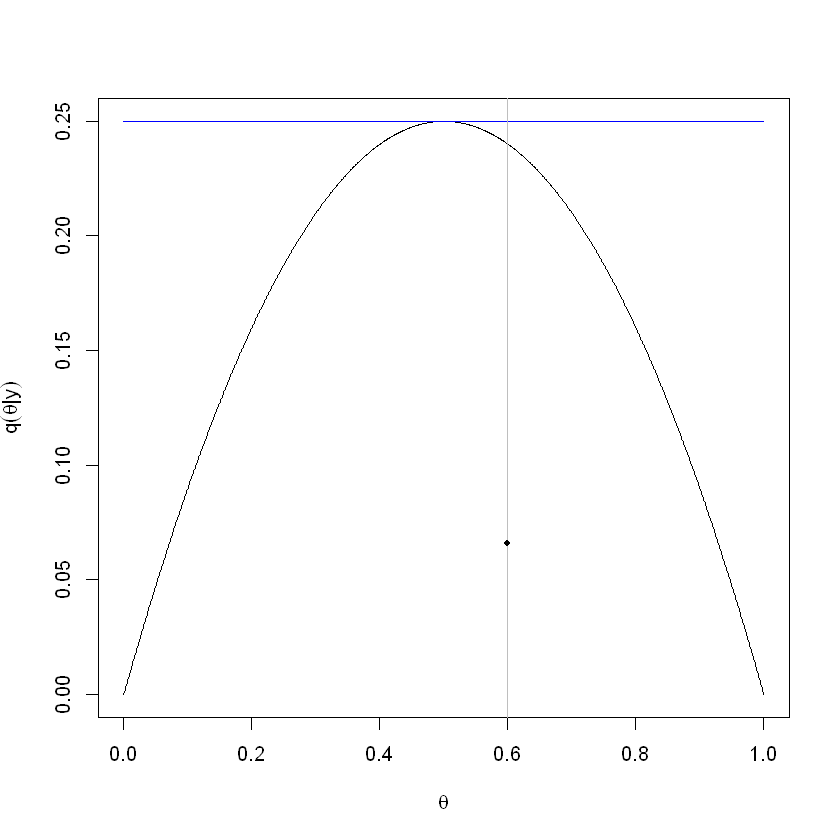

Consider drawing another sample from $p(\theta \mid y)$:

-   We draw a value $\theta^*$ from the $U(0,1)$ distribution.
    -   Suppose this value is $\theta^*=0.185$.
-   We draw $u^{*}=0.176$ from
    $U(0, Mg(\theta^*))=U(0, 0.25g(0.185))=U(0, 0.25)$.
-   $u^{*}=0.176 > 0.151 = q(\theta^{*}|y) = q(0.185|y)$, so we reject
    the proposed value of $\theta^{*}$.

Let’s visualize this.

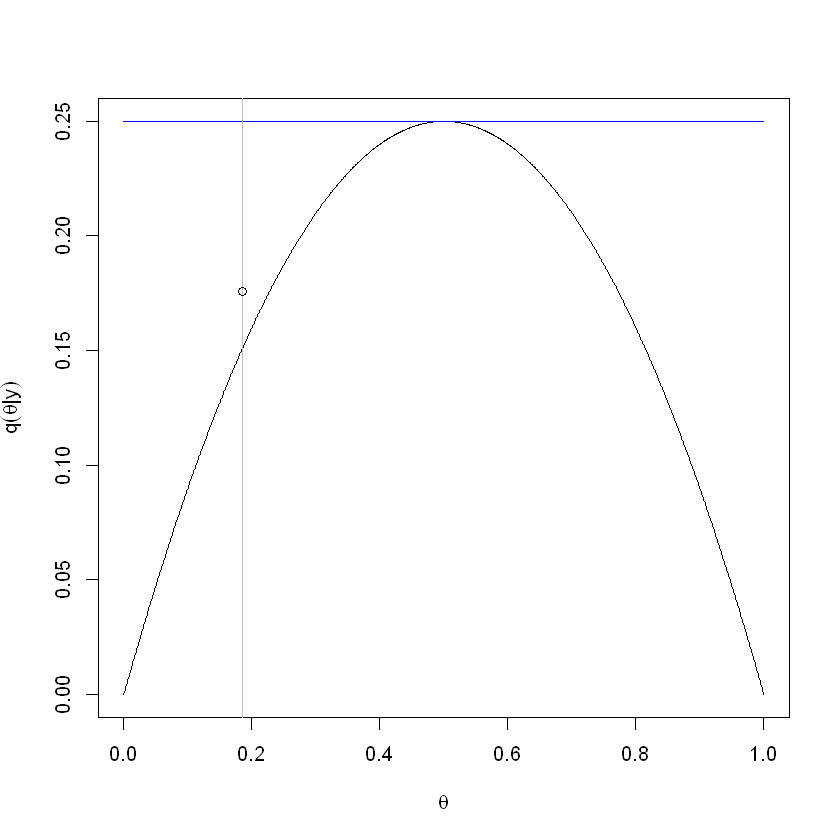

Let’s run a rejection sampling algorithim to draw samples from the
target distribution. We plot closed circles for each $(\theta^*, u^*)$
that’s accepted and a closed circle for each $(\theta^*, u^*)$ that’s
rejected.

In [6]:
# plot target density and bounding function
theta = seq(0, 1, len = 1000)
plot(theta, qtarget(theta), type = "l", xlab = expression(theta),
     ylab = expression(q(theta*"|"*y)))
lines(theta, gM(theta), col = "blue")
# plot some earlier results
thetastar1 = 0.6
thetastar2 = 0.185
u1 = 0.066
u2 = 0.176
accept1 = TRUE
accept2 = FALSE
points(thetastar1, u1, pch = ifelse(accept1, 20, 1))
points(thetastar2, u2, pch = ifelse(accept2, 20, 1))
for(i in 1:98) {
  thetastar = runif(1)
  u = runif(1, 0, gM(thetastar))
  accept = (u <= qtarget(thetastar))
  points(thetastar, u, pch = ifelse(accept, 20, 1))
}
title("Accepted (black dot) vs Rejected (open circle) comparison")

## Rejection sampling example 2

We illustrate rejection sampling by drawing from an unnormalized Beta(3,
3).

We will compare our rejection sampling results with the truth.

*Target density*

$p(\theta | y) \propto \theta^2 (1 - \theta)^2 = q(\theta).$

*Proposal distribution*

Since $q(\theta)$ has finite support, our proposal distribution can be
$G\sim U(0,1)$.

We simply need to choose an appropriate bounding constant $M$ for our
bounding function.

Taking the derivative of $q(\theta)$ with respect to $\theta$, we can
determine that the function has a maximum at $\theta = 1/2$.

The maximum is $q(1/2) = 0.0625$.

Thus, $q(\theta) <= g(\theta)M$ with $M = 0.0625$.

We define the unnormalized target density.

In [7]:
qtarget = function(theta) {
    theta^2*(1 - theta)^2
}

We define the bounding function.

In [8]:
gM = function(theta) {
    rep(.0625, length(theta))
}

We compare the target density and bounding function.

In [9]:
theta = seq(0, 1, len = 1000)
plot(theta, qtarget(theta), type = "l", xlab = expression(theta),
     ylab = expression(q(theta)))
lines(theta, gM(theta), col = "blue")
abline(v = 1/2)

We now implement our rejection sampling algorithm.

In [10]:
B = 1000 # number of samples to keep
mytheta = numeric(B) # vector to store kept samples

i = 0 # the samples accepted
while (i < B) {
  x = runif(1) # sample from g distribution

  # accept x with probability q(x)/gM(x)
    if (runif(1) <= qtarget(x)/gM(x)) {
        i = i + 1
        mytheta[i] = x
    }
}

Lastly, we compare our empirical density to the true density.

In [11]:
dmytheta = density(mytheta)
dtruth = dbeta(theta, 3, 3)

plot(dmytheta, xlab = expression(theta), ylab = "density", main = "")
lines(theta, dtruth, col = "orange")
legend("topleft", legend = c("approximation", "truth"),
       col = c("black", "orange"), lwd = c(1, 1))

## Rejection sampling example 3

We repeat the previous example with a more efficient proposal
distribution.

Since we know that our target density is symmetric around 0.5, we choose
to bound it by a normal distribution centered around 0.5.

*Proposal distribution*

$G\sim N(0.5, 0.25^2)$.

We choose $M=0.04$ for our bounding function (chosen by trial and
error).

We define bounding function.

In [12]:
gM = function(theta) {
    0.04 * dnorm(theta, mean = 0.5, sd = 0.25)
}

We compare the target density to the bounding function.

In [13]:
theta = seq(0, 1, len = 1000)
plot(theta, qtarget(theta), type = "l", xlab = expression(theta),
     ylab = expression(q(theta)))
lines(theta, gM(theta), col = "blue")
abline(v = 1/2)

We now implement our rejection sampling algorithm.

In [14]:
B = 100000
mytheta = numeric(B)

i = 0 # the samples accepted
while (i < B) {
  x = rnorm(1, mean = 0.5, sd = 0.25) # sample from g distribution

  # accept x with probability q(x)/gM(x)
    if (runif(1) <= qtarget(x)/gM(x)) {
        i = i + 1
        mytheta[i] = x
    }
}

Lastly, we compare our empirical density to the true density.

In [15]:
dmytheta = density(mytheta)
dtruth = dbeta(theta, 3, 3)

plot(theta, dtruth, col = "orange", type = "l")
lines(dmytheta)
legend("topleft", legend = c("approximation", "truth"),
       col = c("black", "orange"), lwd = c(1, 1))

## Rejection sampling example 4

We want to sample from a folded $N(0,1)$ distribution.

-   If $y\sim N(0,1)$, then $|y|$ is a folded $N(0,1)$ distribution.

*Target density*

$q(\theta) = \exp(-\theta^2/2)I_{[0,\infty)}(\theta)$.

*Proposal distribution*

$G\sim \mathrm{Exp}(1)$.

How do we choose a bounding constant?

The optimal solution is find a single intersecting point between the
folded normal and our envelope (at the inflection point of the folded
normal), which is at $\theta = 1$.

$\frac{dq(\theta)}{d\theta} = -\exp(-\theta^2/2)\theta$.

$\frac{d^2q(\theta)}{d\theta^2} = \exp(-\theta^2/2)(\theta^2-1)$.

Setting $g(\theta)M = q(\theta)$ and solving for $M$ when $\theta = 1$
results in the solution $M = \exp(1/2)$.

We define the target density.

In [16]:
qtarget = function(theta) {
    exp(-theta^2/2)
}

We define the bounding function.

In [17]:
gM = function(theta) {
    dexp(theta)*exp(1/2)
}

We compare the target density to the bounding function.

In [18]:
theta = seq(0, 5, len = 1000)
plot(theta, qtarget(theta), ylim = c(0, qtarget(0.001)),
     type = "l",
     ylab = "qtarget", xlab = expression(theta))
lines(theta, gM(theta), type = "l", col = "blue")
legend("topright", legend = c("qtarget", "gM"),
       lty = 1, col = c("black", "blue"))

We now implement our rejection sampling algorithm.

In [19]:
B = 10000 # number of retained samples desired
mytheta = numeric(B) # vector to store samples
i = 0 # number of retained samples
while (i < B) {
    x = rexp(1) # draw a value from proposal distribution
    # accept the value with probability based on the importance
    # ratio
    if (runif(1) <= qtarget(x)/gM(x)) {
        i = i + 1 # increment i if sample retained
        mytheta[i] = x # store sample
    }
}

Lastly, we compare our empirical density to the true density.

In [20]:
#The true density
dens = function(theta) {
    sqrt(2/pi)*exp(-theta^2/2)
}

dmytheta = density(mytheta, from = 0, to = 5, cut = 0)
plot(dmytheta, xlab = "theta", ylab = "density", main = "")
lines(theta, dens(theta), col = "blue")
legend("topright", legend = c("approximation", "truth"),
    lwd = c(1, 1), col = c("black", "blue"))

Why didn’t that work properly?

Let’s try a different approach.

In [21]:
# plot with a probability histogram instead to get a better comparison
hist(mytheta, freq = FALSE, breaks = 100)
lines(theta, dens(theta), col = "blue")
legend("topright", legend = c("approximation", "truth"),
    lwd = c(1, 1), col = c("black", "blue"))

## Rejection sampling example 5

The last example chose a proposal distribution analytically. We
probability wouldn’t do that unless we were forced to. Let’s try
something more realistic.

*Proposal distribution*

$G\sim \chi^2_2$ with bounding constant $M=2.4$ (chosen by trial and
error).

We create the bounding function.

In [22]:
gM = function(theta) {
    2.4 * dchisq(theta, df = 2)
}

We compare the target density and bounding function.

In [23]:
theta = seq(0, 5, len = 1000)
plot(theta, gM(theta), type = "l", col = "blue",
     xlab = expression(theta), ylab = "", ylim = c(0, 1.25))
lines(theta, qtarget(theta))
legend("topright", legend = c("q", "gM"), lty = 1,
       col = c("black", "blue"))

We implement our rejection sampling algorithm.

In [24]:
B = 10000
mytheta = numeric(B)
i = 0
while (i < B) {
    x = rchisq(1, df = 2)
    if (runif(1) <= qtarget(x)/gM(x)) {
        i = i + 1
        mytheta[i] = x
    }
}

Lastly, we compare our empirical density to the true density.

In [25]:
hist(mytheta, freq = FALSE, breaks = 100)
lines(theta, dens(theta), col = "blue")
legend("topright", legend = c("approximation", "truth"),
       lwd = c(1, 1), col = c("black", "blue"))